# Clase 4 - Ejercicios de mitad de curso
<br/>

## Curso de Especialización en Inteligencia Artificial
## Analisis profundo
<br/>

### Autor: Maximiliano Torti
### Fecha: 23/07/21
<br/>


# 1. Stochastic Gradient Descent

a- Implementar en Python un algoritmo basado en Stochastic Gradient Descent
para encontrar numéricamente el mínimo de 𝑦 = (𝑥 − 2)^2+3 . ¿Cuál es
el mínimo valor que encontró el algoritmo y para qué valor de x? ¿En qué
momento detuviste la búsqueda y por qué? ¿Cómo inicializamos los valores
random del algoritmo y cómo afectan la convergencia? ¿Cuáles son los hiper
parámetros del algoritmo?

b- Agregar al algoritmo del punto (a) un momento de primer orden. ¿Cuáles son
los hiper parámetros del algoritmo?

c- Agregar al algoritmo del punto (b) un momento de segundo orden. ¿Cuáles
son los hiper parámetros del algoritmo?

d- Definir los mismos valores random iniciales para los tres optimizadores (a),
(b) y (c). Para todos los casos graficar los gradientes en función de las
iteraciones. ¿Qué algoritmo converge más rápido?

In [1]:
import numpy as np

%matplotlib inline
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (20, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 20

## Punto a

Consideramos y = (x-2)^2 +3 como función de costo y aplicamos stochastic gradient descent a esta función.

In [2]:
def loss_function(x):
    """
    Tool to calculate loss function

    Parameters
    ----------
    x : float
        input value

    Returns
    -------
    int
        float
    """
    y = np.power(x-2,2)+3
    return y


def gradient(x):
    """
    Tool to calculate loss function gradient

    Parameters
    ----------
    x : float
        input value

    Returns
    -------
    float
        loss function gradient
    """
    grad = 2 * (x-2)
    return grad

def StochasticGradientDescent(x, lr, epochs, tolerance):
    """
    Stochastic gradient descent to graph and calculate the minimum of loss 
    function.

    Parameters
    ----------
    x : float
        initial input value
        
    lr : float
        learning rate
    
    epochs : int
        number of epochs
    

    Returns
    -------
    x : float
        value where cost function is minimum    
    """
    loss=[]
    x_values=[]
    for i in range(epochs):
        x_values.append(x)
        loss.append(loss_function(x))
        x2=x-lr*gradient(x)
        if np.abs(x2-x)<tolerance:
            break
        x=x2
    
    fig, ax = plt.subplots(2,figsize=(10,10))
    ax[0].plot(loss,c='blue')
    ax[0].set_title("Loss")
    ax[1].plot(x_values,c='red')
    ax[1].set_title("X values")
    ax[1].set_xlabel("Epochs")
    
    return x

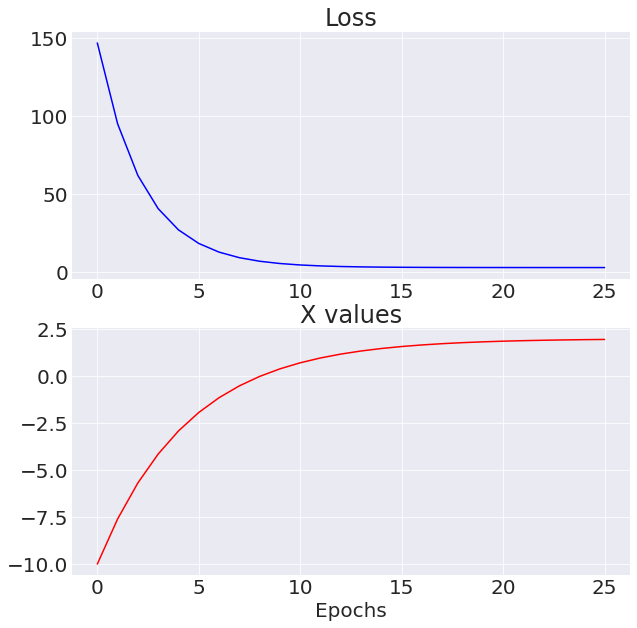

In [3]:
x_min=StochasticGradientDescent(np.random.randint(-10,10),0.1,30,tolerance=0.01)

In [4]:
print("X min: {}".format(x_min))
print("Y_min: {}".format(loss_function(x_min)))

X min: 1.9546652817644516
Y_min: 3.0020552366774966


- En este caso el valor mínimo que encontro es 3 para un valor de X de 1.95 (cercano al valor óptimo de 2)


- En mi implementación el algoritmo se detiene luego de cierto número de epochs o luego de que el parámetro no se actualice por debajo de cierta tolerancia (lo que suceeda primero). Este último artilugio lo agregué para no ejecutar el algoritmo por un exceso de veces donde lo único que se lograría sería oscilar los parámetros alrededor de la solución ideal.


- En este algoritmo el parámetro random es X. En este caso se utilizó un randint aleatorio para inicializarlo. Dado que la función es convexa, el valor inicial de X no afecta la convergencia, solo afecta el número de epochs que serán necesarios para alcanzar una solución óptima.


- En este algoritmo los hiperparámetros son el learning rate, el número de epochs y la tolerancia. Cabe aclarar que no es necesario ajustar el número de pochs y la tolerancia sino que ajustando uno solo de ambos parámetros sería suficiente).

--------------------------------------------------------------------------------------------------------------------------------
## Punto b

In [12]:
def StochasticGradientDescentFirstOrder(x, lr, sigma, epochs, tolerance):
    """
    Stochastic gradient descent to graph and calculate the minimum of loss 
    function.

    Parameters
    ----------
    x : float
        initial input value
        
    lr : float
        learning rate
        
    sigma : float
        first order speed
    
    epochs : int
        number of epochs
    

    Returns
    -------
    x : float
        value where cost function is minimum    
    """
    loss=[]
    x_values=[]
    momentum=0
    for i in range(epochs):
        x_values.append(x)
        loss.append(loss_function(x))
        momentum =  sigma * momentum + lr * gradient(x)
        x2=x-momentum
        if np.abs(x2-x)<tolerance:
            break
        x=x2
    
    fig, ax = plt.subplots(2,figsize=(10,10))
    ax[0].plot(loss,c='blue')
    ax[0].set_title("Loss")
    ax[1].plot(x_values,c='red')
    ax[1].set_title("X values")
    ax[1].set_xlabel("Epochs")
    
    return x

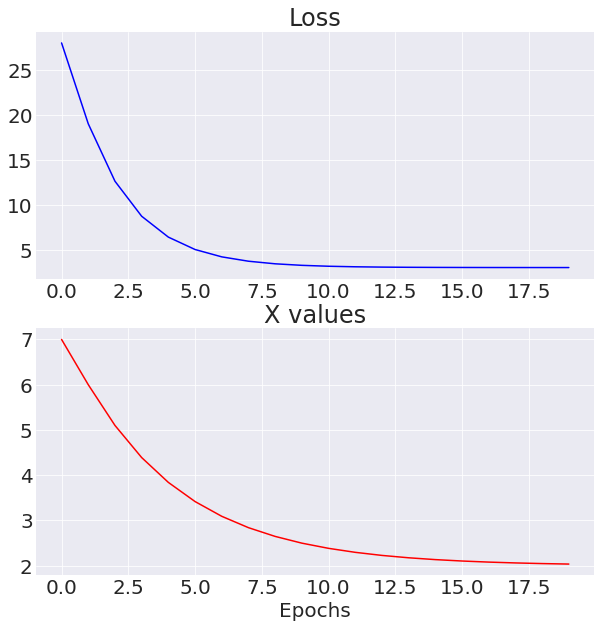

In [13]:
x_min=StochasticGradientDescentFirstOrder(np.random.randint(-10,10),\
                                          0.1,\
                                          0.1,\
                                          30,\
                                          tolerance=0.01)

In [7]:
print("X min: {}".format(x_min))
print("Y_min: {}".format(loss_function(x_min)))

X min: 1.958361367790484
Y_min: 3.0017337756922795


- En este caso, a los hiperparámetros del caso anterior se le suma el "factor de velocidad o inercia"

--------------------------------------------------------------------------------------------------------------------------------
## Punto c

In [8]:
def StochasticGradientDescentSecondOrder(x, lr, p1, p2, epochs, tolerance):
    """
    Stochastic gradient descent to graph and calculate the minimum of loss 
    function.

    Parameters
    ----------
    x : float
        initial input value
        
    lr : float
        learning rate
        
    p1 : float
        first order speed
    
    p2 : float
        first order speed
    
    epochs : int
        number of epochs
    

    Returns
    -------
    x : float
        value where cost function is minimum    
    """
    loss=[]
    x_values=[]
    first_momentum=0
    second_momentum=0
    for i in range(epochs):
        
        x_values.append(x)
        loss.append(loss_function(x))
        
        grad=gradient(x)
        first_momentum =  p1 * first_momentum + (1-p1) * grad
        second_momentum = p2 * second_momentum + (1-p2) * grad * grad
        delta = - ( lr / np.sqrt(second_momentum)) * first_momentum
        x2 = x + delta
        
        if np.abs(x2-x)<tolerance:
            break
        
        x=x2
    
    fig, ax = plt.subplots(2,figsize=(10,10))
    ax[0].plot(loss,c='blue')
    ax[0].set_title("Loss")
    ax[1].plot(x_values,c='red')
    ax[1].set_title("X values")
    ax[1].set_xlabel("Epochs")
    
    return x

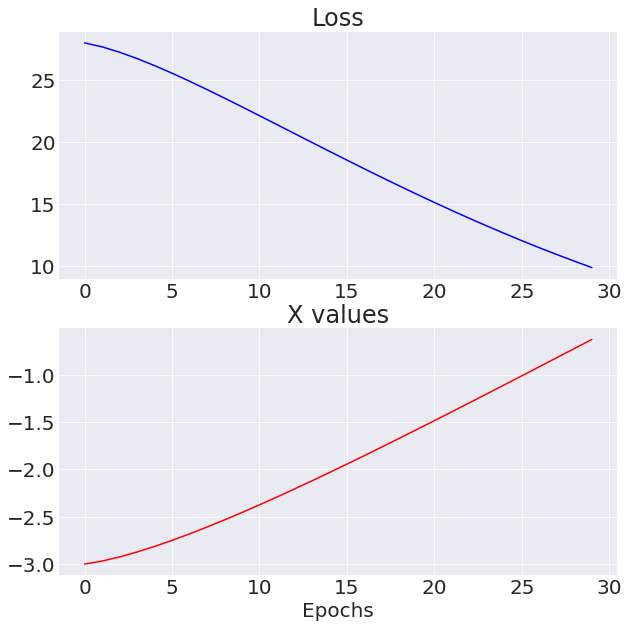

In [9]:
x_min=StochasticGradientDescentSecondOrder(np.random.randint(-10,10),\
                                          0.1,\
                                          0.9,\
                                          0.9,
                                          30,\
                                          tolerance=0.01)

In [10]:
print("X min: {}".format(x_min))
print("Y_min: {}".format(loss_function(x_min)))

X min: -0.5331148787392279
Y_min: 9.416670988890054


- En este algoritmo, a los hiperparámetros del caso anterior se agrega un segundo hiperparámetro que es el peso del momento de segundo orden.

--------------------------------------------------------------------------------------------------------------------------------
## Punto d

95.53697136015975

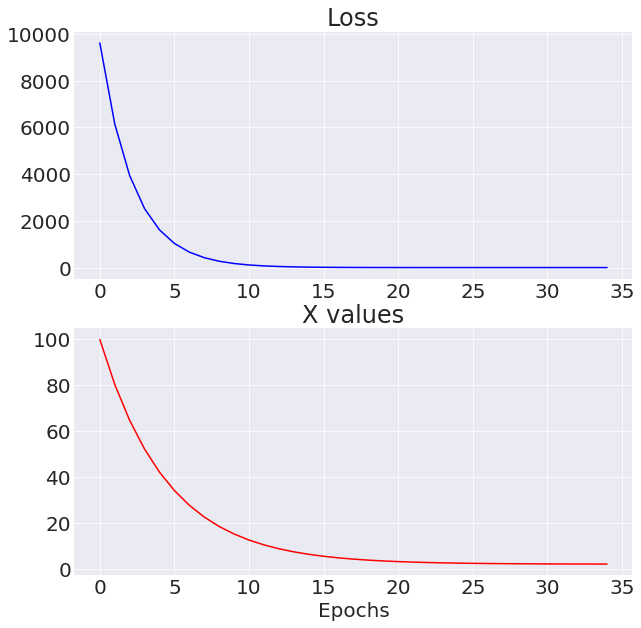

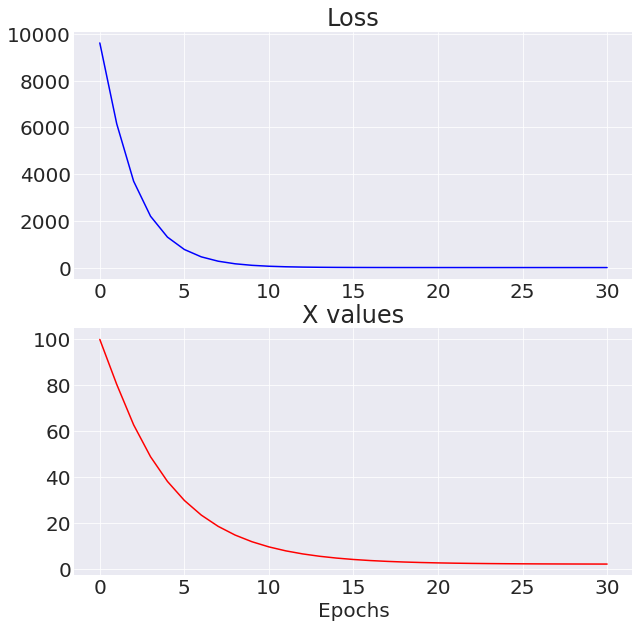

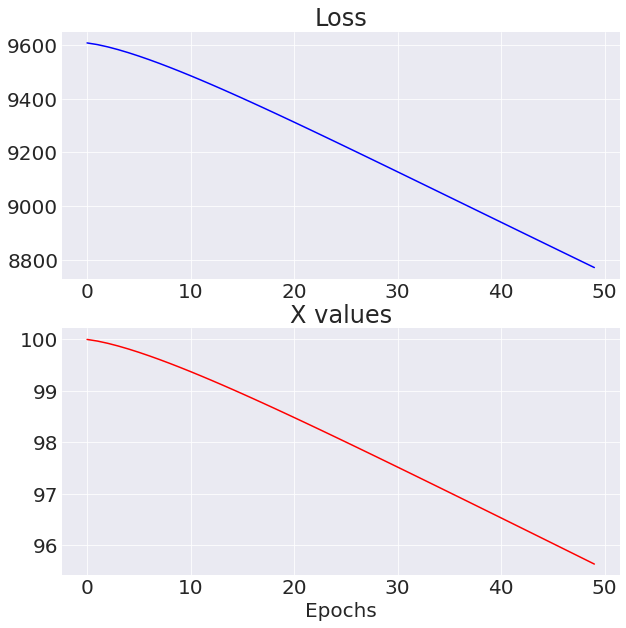

In [11]:
StochasticGradientDescent(100,0.1,50,tolerance=0.01)

StochasticGradientDescentFirstOrder(100,\
                                    0.1,\
                                    0.1,\
                                    50,\
                                    tolerance=0.01)

StochasticGradientDescentSecondOrder(100,\
                                     0.1,\
                                     0.9,\
                                     0.9,
                                     50,\
                                     tolerance=0.01)

En este caso vemos que el algoritmo que mas rápido converge a la solución ideal es el algoritmo de primer momento.

Es posible que el algoritmo de segundo momento converga de manera más rapida con una adecuada selección de hiperparámetros. Pero en este caso son demasiados hiperparámetros para un problema simple.